In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mlb_salaries.csv to mlb_salaries.csv


In [ ]:
df = pd.read_csv('/content/mlb_salaries.csv')
df.head()

,playerid,player_name,weight,height,bats,throws,season,league,teamid,team,franchise,salary
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,San Francisco Giants,300000
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,Chicago White Sox,387500
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,Boston Red Sox,403250
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,Seattle Mariners,419000
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,New York Yankees,500000


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerid     28293 non-null  object
 1   player_name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   season       28293 non-null  int64 
 7   league       28293 non-null  object
 8   teamid       28293 non-null  object
 9   team         28293 non-null  object
 10  franchise    28293 non-null  object
 11  salary       28293 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.6+ MB
None
             weight        height        season        salary
count  28293.000000  28293.000000  28293.000000  2.829300e+04
mean     199.049305     73.500194   2000.938183  2.112965e+06
std       22.653983      2.286595      8.900551  3.440239e+06
min      140.0

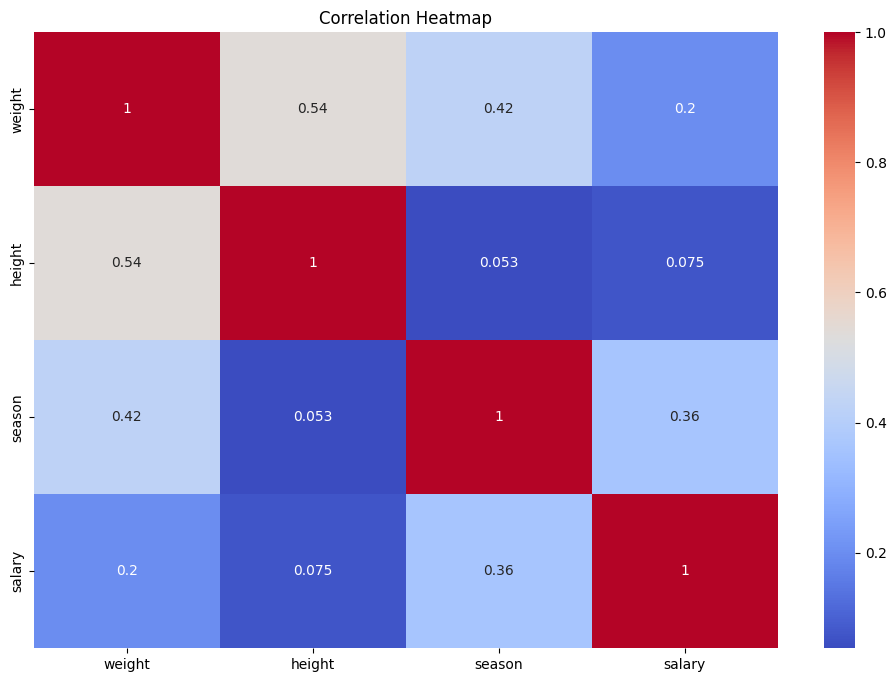

In [ ]:

numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 6080020180234.507
Root Mean Squared Error (RMSE): 2465769.693267096
R2 Score: 0.481364283026525


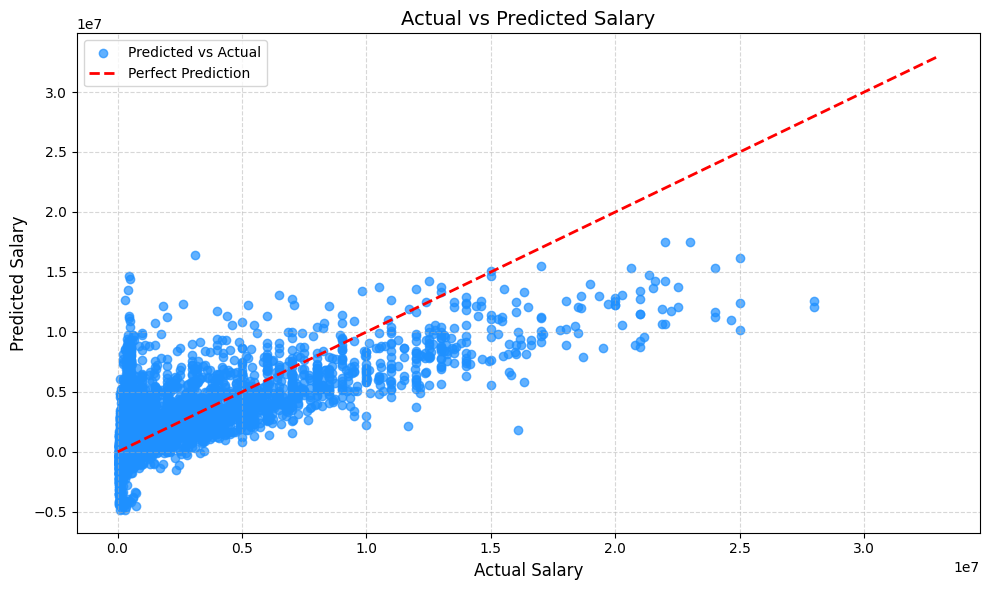

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Salary", fontsize=12)
plt.ylabel("Predicted Salary", fontsize=12)
plt.title("Actual vs Predicted Salary", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
